In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [6]:
books = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Books.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [7]:
users = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Users.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)
user_book_ratings = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/CapstoneProject_2/Data/BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)


In [8]:
books.shape

(271360, 8)

In [9]:
users.shape

(278858, 3)

In [10]:
user_book_ratings.shape

(1149780, 3)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
user_book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Books data set EDA

##### Dropping the Image Columns

In [14]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

ValueError: labels ['imageUrlS' 'imageUrlM' 'imageUrlL'] not contained in axis

In [16]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [17]:
#setting the column display to wide to better visualise the column contents
#books.set_option('display.max_colwidth',-1)
#books.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',-1)


In [18]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### EDA on 'yearsOfPublication'

In [8]:
#checking yearOfPublication
books.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909', '2008',

In [19]:
#lets correct all the wrong entries where we see name instead of a year 
#lets correct 'DK Publishing Inc' 
books.loc[books['yearOfPublication'] == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [20]:
#correcting the two rows above
books.loc[books['ISBN'] == '078946697X','bookAuthor'] = 'Michael Teitelbaum'
books.loc[books['ISBN'] == '078946697X','yearOfPublication'] = '2000'
books.loc[books['ISBN'] == '078946697X','publisher'] = 'DK Publishing Inc'



books.loc[books['ISBN'] == '0789466953','bookAuthor'] = 'James Buckley'
books.loc[books['ISBN'] == '0789466953','yearOfPublication'] = '2000'
books.loc[books['ISBN'] == '0789466953','publisher'] = 'DK Publishing Inc'



In [22]:
books.loc[books['ISBN'] == '078946697X',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",Michael Teitelbaum,2000,DK Publishing Inc


In [23]:
books.loc[books.ISBN == '0789466953',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",James Buckley,2000,DK Publishing Inc


In [24]:
#lets correct 'Gallimard'

books.loc[books['yearOfPublication'] == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [25]:
#correcting the row above
books.loc[books['ISBN'] == '2070426769','bookAuthor'] = 'ean-Marie Gustave Le'
books.loc[books['ISBN'] == '2070426769','yearOfPublication'] = '2003'
books.loc[books['ISBN'] == '2070426769','publisher'] = 'Gallimard'
books.loc[books['ISBN'] == '2070426769','bookTitle'] = 'Peuple du ciel, suivi de \'Les Bergers'


In [26]:
books.loc[books['ISBN'] == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",ean-Marie Gustave Le,2003,Gallimard


In [27]:
books['yearOfPublication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', '1909', '2008', '1378', '1919', '1922', '1897',
 

In [28]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [29]:
#Converting the yearOfPublication to int

books['yearOfPublication'] = pd.to_numeric(books.yearOfPublication)

In [53]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int64 
publisher            object
dtype: object

In [30]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    int64 
publisher            object
dtype: object

In [31]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [32]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

#### We still see some values in 'yearOfPublication' that are '0' or 1378' or '2030'
#### lets replace everything before 1900 and evertyhing after 2010 with the average  value 

In [33]:
books.yearOfPublication.mean()

1959.7612728478773

(1900, 2010)

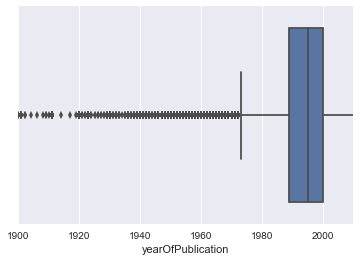

In [34]:
sns.boxplot(x='yearOfPublication', data=books)
plt.xlim(1900, 2010)

In [35]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [37]:
books_new = impute_outliers(df=books, column='yearOfPublication' , minimum=1900, maximum=2010)


In [38]:
books_new.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [39]:
#lets convert 'yearsOfPublication' to int32 to get ridoff decimal 


books['yearOfPublication'] = books['yearOfPublication'].astype(np.int32)

In [40]:
books_new.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [41]:
books_new['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1959, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948,
       1943, 1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932,
       1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921,
       1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 2006, 1909, 2008,
       1919, 1922])

In [42]:
books_new.loc[books_new['yearOfPublication'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


#### EDA on 'publisher' feature

In [43]:
books_new.loc[books_new['publisher'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [44]:
#lets correct the columns without any values by replacing with 'unknown'
books_new.loc[books_new.ISBN == '193169656X','publisher'] = 'UnKnown'
books_new.loc[books_new.ISBN == '1931696993','publisher'] = 'UnKnown'

In [45]:
books_new.loc[books_new['publisher'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


#### EDA on 'ISBN' feature

In [46]:
books_new.loc[books_new['ISBN'].isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [47]:
#Checking ISBN
books_new['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

### Users data set EDA

In [48]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [49]:
users.dtypes

User-ID     int64  
Location    object 
Age         float64
dtype: object

#### EDA on 'Age' feature

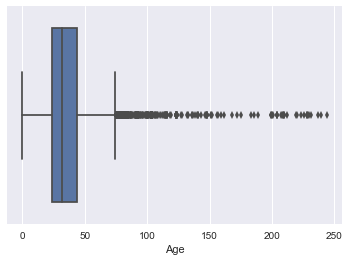

In [50]:
sns.boxplot(x='Age', data=users)


#### As we can see above there are lot of outliers and some high values in Age like greater than 90 years so we are going to do two things:
##### 1> For the all the 'Age' with values NaN , replace with the Average Age
##### 2> Replace any 'Age' less then 5 and greater then 90 with the Average Age

In [51]:
users['Age']=users['Age'].fillna(users['Age'].mean())

In [52]:
users_new = impute_outliers(df=users, column='Age' , minimum=5, maximum=90)


In [53]:
users_new.loc[users['Age'].isnull(),:]

,User-ID,Location,Age


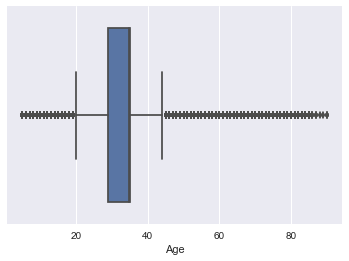

In [54]:
sns.boxplot(x='Age', data=users_new)

In [55]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


In [56]:
#We see the decimal in the 'Age' so we will convert it to int32

users['Age'] = users['Age'].astype(np.int32)


In [57]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


### Ratings data set EDA

In [58]:
user_book_ratings.shape

(1149780, 3)

In [59]:
user_book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Lets check if all the Users in the 'user_book_ratings_new' are also in 'users' table to make sure there is no stray user

In [60]:
user_book_ratings_new = user_book_ratings[user_book_ratings['User-ID'].isin(users['User-ID'])]

In [61]:
user_book_ratings_new.shape

(1149780, 3)

#### This proves that we dont have any user in the 'user_book_ratings_new' that is not part of 'users'

#### Lets check if all the Books in the 'user_book_ratings_new' are also in 'books' table to make sure there is no stray book

In [62]:
user_book_ratings_new = user_book_ratings[user_book_ratings['ISBN'].isin(books['ISBN'])]

In [63]:
user_book_ratings_new.shape

(1031136, 3)

#### This proves that we have books in the 'user_book_ratings_new' that is not part of 'books'
#### As shown below we just merge/join the 'user_book_ratings_new' and 'books' table to only have the books that are part of 'books'

In [64]:
df = pd.merge(user_book_ratings,books,on='ISBN')
df.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [65]:
df.shape

(1031136, 7)

#### Lets Merge the 'user_book_ratings' with 'users'

In [66]:
df_new = pd.merge(df,users,on='User-ID')
df_new.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23


In [67]:
df_new.shape

(1031136, 9)

In [68]:
df_new.groupby('bookTitle')['Book-Rating'].count().sort_values(ascending=False).head()

bookTitle
Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code             898 
A Painted House               838 
The Nanny Diaries: A Novel    828 
Name: Book-Rating, dtype: int64

#### We will take a rating of '0' as the user has not read the book, so lets keep this out

In [69]:
df_new_explicit = df_new[df_new['Book-Rating'] != 0]

In [70]:
df_new_explicit.shape

(383842, 9)

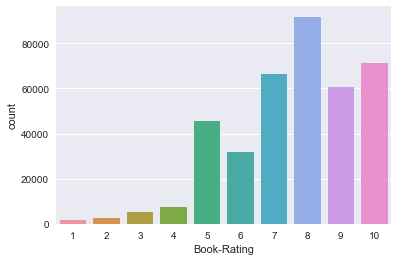

In [71]:
sns.countplot(data=df_new_explicit,x='Book-Rating')
plt.show()

In [72]:
df_new_explicit.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head()

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0060928336    320
Name: Book-Rating, dtype: int64

### Recommendations based on Most Popular Items 

In [73]:
top_10_recommend = df_new_explicit.groupby('ISBN')['Book-Rating'].sum().sort_values(ascending=False).head(10)

top_10_recommend_df = pd.DataFrame(df_new_explicit.groupby('ISBN')['Book-Rating'].sum().sort_values(ascending=False).head(10))

In [74]:
top_10_recommend_df.head()

,Book-Rating
ISBN,
0316666343,5787
0385504209,4108
0312195516,3134
059035342X,2798
0142001740,2595


In [75]:
#Note that 'ISBN' is an index in the data frame 'top_10_recomend_df' 
#So below we set the argument 'left_index=True'
top_10_df = top_10_recommend_df.merge(books,right_on='ISBN',left_index=True) 

In [123]:
top_10_df

,Book-Rating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


### A few similarity functions

These were all written to operate on two pandas Series, each one representing the rating history of two different users. You can also apply them to any two feature vectors that describe users or items. In all cases, the higher the return value, the more similar two Series are. You might need to add checks for edge cases, such as divisions by zero, etc.

- Euclidean 'similarity'

$$ sim(x,y) = \frac{1}{1 + \sqrt{\sum (x - y)^2}}$$

In [126]:
def euclidean(s1, s2):
    """Take two pd.Series objects and return their euclidean 'similarity'."""
    diff = s1 - s2
    return 1 / (1 + np.sqrt(np.sum(diff ** 2)))

- Manhatten 'similarity'

$$ sim(x,y) = \frac{1}{1 +{\sum (x - y)}}$$

In [25]:
def manhatten(s1, s2):
    """Take two pd.Series objects and return their euclidean 'similarity'."""
    diff = s1 - s2
    return 1 / (1 + np.sum(diff))

- Cosine similarity

$$ sim(x,y) = \frac{(x . y)}{\sqrt{(x . x) (y . y)}} $$

In [26]:
def cosine(s1, s2):
    """Take two pd.Series objects and return their cosine similarity."""
    return np.sum(s1 * s2) / np.sqrt(np.sum(s1 ** 2) * np.sum(s2 ** 2))

- Pearson correlation or Adjusted Cosine Similarity

$$ sim(x,y) = \frac{(x - \bar x).(y - \bar y)}{\sqrt{(x - \bar x).(x - \bar x) * (y - \bar y)(y - \bar y)}} $$

In [93]:
def pearson(s1, s2):
    """Take two pd.Series objects and return a pearson correlation."""
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

- Jaccard similarity

$$ sim(x,y) = \frac{(x . y)}{(x . x) + (y . y) - (x . y)} $$

In [130]:
def jaccard(s1, s2):
    dotp = np.sum(s1 * s2)
    return dotp / (np.sum(s1 ** 2) + np.sum(s2 ** 2) - dotp)



#### Note that the next step is to generate the User-to-Item Matrix which is going to be a sparce matrix so to make sure my porsenal computer can effectively process this matix I am going to only consider the book that has atleast 100 ratings and users who have reated atleast 100 books

In [76]:
book_counts = df_new_explicit['Book-Rating'].value_counts()

In [33]:
#It says that '91804' total books got the rating '8'
#'71225' total books got the rating '10'
#'7617' total books got the rating '4'

book_counts

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4     7617 
3     5118 
2     2375 
1     1481 
Name: Book-Rating, dtype: int64

In [50]:
book_counts.size

10

In [77]:
book_counts_100 = book_counts[book_counts > 100]

In [35]:
book_counts_100

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4     7617 
3     5118 
2     2375 
1     1481 
Name: Book-Rating, dtype: int64

In [52]:
book_counts_100.size

10

In [78]:
df_new_explicit_red = df_new_explicit[df_new_explicit['Book-Rating'].isin(book_counts_100.index)]

In [79]:
user_counts = df_new_explicit['User-ID'].value_counts()

In [80]:
user_counts_100 = user_counts[user_counts > 100]

In [ ]:
user_counts_100.size

In [81]:
df_new_explicit_red = df_new_explicit_red[df_new_explicit_red['User-ID'].isin(user_counts_100.index)]

In [82]:
df_new_explicit_red.shape

(102371, 9)

In [46]:
df_new_explicit_red.head()

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa",34
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa",34
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa",34
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa",34
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa",34


In [83]:
booksmat = df_new_explicit_red.pivot_table(index='User-ID',columns='ISBN',values='Book-Rating')
userID = booksmat.index
ISBN = booksmat.columns


In [84]:
print(booksmat.shape)

(440, 66076)


In [85]:
booksmat.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings



In [86]:
booksmat.fillna(0, inplace = True)
booksmat = booksmat.astype(np.int32)

In [87]:
booksmat.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### User-User Based Collaborative Filtering using SKLearn NearestNeighbor Library

In [107]:
from sklearn.neighbors import NearestNeighbors

In [108]:
def findksimilarusers(user_id, ratings,metric,k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
            
    return similarities,indices

In [109]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings,metric,k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    #mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            #print('This is the current User so no need to find distance to itself = ',indices.flatten()[i])
            continue;
        else: 
            #check if the similar user has also rated this item and take the wight of those ratings 
            #which is in 'similarities' to come up with the rating for this item for this user
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
            if wtd_sum==0 or sum_wt==0:
                prediction=1
            else:
                prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    #prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    #print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [110]:
def recommendUser(user_id, ratings,metric,type_itemuser,k):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n")
    
    prediction = []            
            
    for i in range(ratings.shape[1]):
        if (ratings[ratings.columns[i]][user_id] > 0): 
               continue; #for already rated items
        else:  #not rated already ,pass each column at a time ,where each column represents ratings for all users
               #for a perticular book or we can say that we pass one item (with its rating from all users) at a time
                #the intuition is for this user we want to check the nearest three users and see if they have rated this
                #perticular item and if so we calculate the cumulative weight to determine how much this user will like
                # this item
                prediction_recieved = predict_userbased(user_id,ratings.columns[i],ratings,metric,k)
                #print('prediction_recieved=',prediction_recieved)
                prediction.append(prediction_recieved)
    
    #note that the list 'prediction' will contains one column for each item and the value of that column will be
    #the predicted rating, after we convert list to pandas data frame , the index will be the column number
    #in the list and value will be actual value at that column
    prediction = pd.Series(prediction)
    #note that when we sort , the index of the respective element will stay as the index inthe sorted data frame
    prediction = prediction.sort_values(ascending=False)
    #we take the first ten items , note that value will be ratings and index will be the actual index of the item
    #in the matrix
    recommended = prediction[:10]
    return recommended
      

In [107]:
booksmat.shape

(440, 66076)

In [103]:

booksmat_resize = booksmat.iloc[0:439,0:9000]

In [104]:
booksmat_resize.shape

(439, 9000)

In [111]:
recomended_list3 = recommendUser(2033,booksmat_resize,'cosine','User',2)

In [112]:
recomended_list3.shape

(10,)

In [113]:
recomended_list3

1256    7
5701    7
7690    6
7673    6
7688    6
1694    6
5632    5
1242    5
7658    5
7674    5
dtype: int64

In [133]:
recomended_list3.values

array([7, 7, 6, 6, 6, 6, 5, 5, 5, 5])

In [134]:
recomended_list3.index

Int64Index([1256, 5701, 7690, 7673, 7688, 1694, 5632, 1242, 7658, 7674], dtype='int64')

In [147]:
books.bookTitle[recomended_list3.index[0]]

'Metropolis (Bfi Film Classics, 54)'

In [114]:
print('Here are the recommended books as per User-User Collaborative Filtering for User-2033\n')

for i in range(0,9):
   
    print('Book-Name = ',books.bookTitle[recomended_list3.index[i]])




Here are the recommended books as per User-User Collaborative Filtering for User-2033

Book-Name =  Metropolis (Bfi Film Classics, 54)
Book-Name =  Mr. Lincoln's Wars : A Novel in Thirteen Stories
Book-Name =  Without Remorse
Book-Name =  Life Strategies: Doing What Works, Doing What Matters
Book-Name =  Gone for Good
Book-Name =  The Alchemist: A Fable About Following Your Dream
Book-Name =  Absent without leave: Two novellas
Book-Name =  The Union Forever (Lost Regiment (Numbered))
Book-Name =  The Island of Lost Maps: A True Story of Cartographic Crime


### Item-Item Based Collaborative Filtering using SKLearn NearestNeighbor Library

In [117]:
def findksimilaritems(item_id, ratings, metric,k):
    similarities=[]
    indices=[]
    #setting the transpose of the matrix
    ratings=ratings.T
    #getitng the location of the item 
    loc = ratings.index.get_loc(item_id)
    #using the SKLearn Nearest Neighbors
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    #since the 'kneighbors' method needs a two dimensional array we reshape our item vector into 2-D array
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    #cosine_similarity = 1 - cosine_distance
    if metric == 'cosine':
        similarities = 1-distances.flatten()

    return similarities,indices

In [118]:
#for each Item check its nearest items and get the distances of each nearest item
#calculate the rating for this item for this user by applying the weight of each neighbour and adding them up
#to come up with the final prediction

def predict_itembased(user_id, item_id, ratings,metric,k):
    
    #print('User id=',user_id)
    #print('item id=',item_id)
    
    
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    
    #print('item_loc=',item_loc)
    #print('User_loc=',user_loc)
    
    similarities, indices=findksimilaritems(item_id, ratings,metric,k) 
    sum_wt = np.sum(similarities)-1
    #print('sum_wt=',sum_wt)
    
    product=1
    
    #print('flatted indeices =', indices.flatten())
    #print('similarities = ',similarities)
    
    for i in range(0, len(indices.flatten())):
        
        #print('i = ',i)
        
        if indices.flatten()[i] == item_loc :
            
            #print('This is the current item so no need to find distance to itself = ',indices.flatten()[i])
            
            continue;
        else:
            #check if this same user had rated other similar item and how much weight to assign
            #'similarities' will give us that , we add this weight 'product' to come up with
            #final rating for the current item
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            
            wtd_sum = wtd_sum + product   
               #print('wtd_sum=',wtd_sum)
            
            if wtd_sum==0 or sum_wt==0:
                prediction=1
            else:
                prediction = int(round(wtd_sum/sum_wt))
      
            #print('prediction = ', prediction)
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
         prediction = 1   
    #elif prediction >10:
     #   prediction = 10

    #print ('Predicted rating for user {0} -> item {1}: {2}\n'.format(user_id,item_id,prediction))      
    
    return prediction


In [119]:
def recommendItem(user_id, ratings,metric,type_itemuser,k):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n")
    
    prediction = []            
            
    for i in range(ratings.shape[1]):
        if (ratings[ratings.columns[i]][user_id] > 0): 
               continue; #for already rated items
        else:  #not rated already ,pass each column at a time ,where each column represents ratings for all users
               #for a perticular book 
                prediction.append(predict_itembased(user_id,ratings.columns[i],ratings,metric,k))
        
    prediction = pd.Series(prediction)
    prediction = prediction.sort_values(ascending=False)
    recommended = prediction[:10]
    return recommended
      

In [120]:
recomended_list5 = recommendItem(2033,booksmat_resize,'cosine','Item',1)

In [121]:
print('Here are the recommended books as per Item-Item Collaborative Filtering for User-2033\n')

for i in range(0,9):
   
    print('Book-Name = ',books.bookTitle[recomended_list5.index[i]])


Here are the recommended books as per Item-Item Collaborative Filtering for User-2033

Book-Name =  Sanft entschlafen. Commissario Brunettis sechster Fall.
Book-Name =  Night Of The Living Dad (Baby Blues Scrapbook , No 6)
Book-Name =  Where I'm Calling from: New and Selected Stories (Vintage Contemporaries)
Book-Name =  Ender's Game (Ender Wiggins Saga (Paperback))
Book-Name =  Song of Solomon (Oprah's Book Club (Paperback))
Book-Name =  The Brothers Karamazov (Vintage Classics)
Book-Name =  Writers Dreaming: 26 Writers Talk About Their Dreams and the Creative Process
Book-Name =  In Cold Blood (Vintage International)
Book-Name =  Cyrano De Bergerac (Bantam Classics)


### SVD-Matrix Factorization based Recommender System

In [122]:
booksmat_matrix = booksmat_resize.as_matrix()
user_ratings_mean = np.mean(booksmat_matrix, axis = 1)
booksmat_matrix_normalised = booksmat_matrix - user_ratings_mean.reshape(-1, 1)

In [123]:
booksmat_matrix_normalised.shape

(439, 9000)

#### Trying with K=50 first

In [124]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(booksmat_matrix_normalised, k = 50)


In [125]:
sigma_diagonal_matrix = np.diag(sigma)

In [126]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma_diagonal_matrix), Vt) + user_ratings_mean.reshape(-1, 1)


In [127]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = booksmat_resize.columns)
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,0312571119,0312572840,0312579667,0312585837,0312619952,0312631901,0312636490,0312643063,0312660472,0312670478
0,-0.011750,0.047884,0.035675,0.047884,0.047884,0.008983,0.062739,0.049797,0.049797,0.022291,...,-0.003122,0.049797,-0.010034,0.014503,0.043407,-0.009535,0.008222,0.035846,0.007444,-0.015440
1,0.001686,-0.002472,-0.000292,-0.002472,-0.002472,0.003934,-0.004911,-0.005852,-0.005852,0.013919,...,0.002579,-0.005852,-0.007448,0.005678,0.008394,0.002748,0.006569,-0.009660,0.004497,-0.002056
2,0.001122,0.001206,0.005741,0.001206,0.001206,0.013956,0.001169,0.003651,0.003651,0.007761,...,0.006255,0.003651,0.004455,0.019539,0.019542,0.006255,0.019528,0.007352,0.014468,0.001104
3,0.017336,0.074738,0.047656,0.074738,0.074738,0.070562,-0.033639,-0.062396,-0.062396,0.195047,...,0.008394,-0.062396,0.856260,0.004723,-0.197066,0.052121,-0.042510,-0.022948,0.019695,0.124214
4,0.001073,0.000066,0.001509,0.000066,0.000066,0.004108,0.000052,0.001987,0.001987,0.002660,...,0.002318,0.001987,0.002506,0.004238,0.004122,0.002006,0.004425,0.003040,0.004239,0.000924


In [128]:
userID = 80
user_row_number = userID - 1 # UserID starts at 1, not 0
sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
recommended = sorted_user_predictions[:10]

In [182]:
recommended

ISBN
0060392452    6.016780
0140067477    2.020183
0064400565    1.647969
014050639X    1.086658
0060177888    1.066138
0028610105    1.029703
0064400557    1.022622
0061009059    0.950304
0140328696    0.938592
0064402053    0.887755
Name: 79, dtype: float64

In [129]:


for i in recommended.index:
    print(books.loc[books['ISBN'] == i,['ISBN','bookTitle','bookAuthor','publisher']],'\n\n')

            ISBN  \
2802  0060392452   

                                                                     bookTitle  \
2802  Stupid White Men ...and Other Sorry Excuses for the State of the Nation!   

         bookAuthor    publisher  
2802  Michael Moore  Regan Books   


          ISBN        bookTitle     bookAuthor      publisher
73  0140067477  The Tao of Pooh  Benjamin Hoff  Penguin Books 


             ISBN      bookTitle   bookAuthor     publisher
10305  0064400565  Stuart Little  E. B. White  HarperTrophy 


             ISBN                               bookTitle     bookAuthor  \
18804  014050639X  Each Peach Pear Plum (Picture Puffins)  Janet Ahlberg   

          publisher  
18804  Puffin Books   


             ISBN  \
13645  0060177888   

                                                                    bookTitle  \
13645  All I Know About Animal Behavior I Learned in Loehmann's Dressing Room   

         bookAuthor      publisher  
13645  Erma Bombeck  Harperc

#### Hyperparameter 'k' tuning

In [130]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(booksmat_resize,test_size=0.25)

In [131]:
booksmat_matrix_train = train_data.as_matrix()
user_ratings_mean_train = np.mean(booksmat_matrix_train, axis = 1)
booksmat_matrix_normalised_trn = booksmat_matrix_train - user_ratings_mean_train.reshape(-1, 1)

In [132]:
booksmat_matrix_normalised_trn.shape

(329, 9000)

In [133]:
from scipy.sparse.linalg import svds
U_trn, sigma_trn, Vt_trn = svds(booksmat_matrix_normalised_trn, k = 50)
s_diag_matrix_trn=np.diag(sigma_trn)

In [134]:
X_pred = np.dot(np.dot(U_trn,s_diag_matrix_trn), Vt_trn)


In [135]:
booksmat_matrix_test = test_data.as_matrix()
user_ratings_mean_test = np.mean(booksmat_matrix_test, axis = 1)
booksmat_matrix_normalised_tst = booksmat_matrix_test - user_ratings_mean_test.reshape(-1, 1)

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    #print('prediction=',prediction)
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    #print('ground_truth=',ground_truth)
    return sqrt(mean_squared_error(prediction, ground_truth))




In [138]:
print('SVD k=50 MSE: ', str(rmse(X_pred, booksmat_matrix_normalised_tst)))

SVD k=50 MSE:  0.5159794091354517


In [139]:
from scipy.sparse.linalg import svds
U_trn, sigma_trn, Vt_trn = svds(booksmat_matrix_normalised_trn, k = 20)
s_diag_matrix_trn=np.diag(sigma_trn)

In [140]:
X_pred = np.dot(np.dot(U_trn,s_diag_matrix_trn), Vt_trn)

In [141]:
print('SVD k=20 MSE: ', str(rmse(X_pred, booksmat_matrix_normalised_tst)))

SVD k=20 MSE:  0.4860161698476999


In [142]:
from scipy.sparse.linalg import svds
U_trn, sigma_trn, Vt_trn = svds(booksmat_matrix_normalised_trn, k = 8)
s_diag_matrix_trn=np.diag(sigma_trn)

In [143]:
X_pred = np.dot(np.dot(U_trn,s_diag_matrix_trn), Vt_trn)

In [144]:
print('SVD k=8 MSE: ', str(rmse(X_pred, booksmat_matrix_normalised_tst)))

SVD k=8 MSE:  0.4575542053446802


#### K=8 gives the model with the least RMSE so lets go with K=8 

In [145]:
U, sigma, Vt = svds(booksmat_matrix_normalised, k = 8)

In [146]:
sigma_diagonal_matrix = np.diag(sigma)

In [147]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma_diagonal_matrix), Vt) + user_ratings_mean.reshape(-1, 1)

In [148]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = booksmat_resize.columns)
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,0312571119,0312572840,0312579667,0312585837,0312619952,0312631901,0312636490,0312643063,0312660472,0312670478
0,0.011451,0.038691,0.030973,0.038691,0.038691,0.016140,0.036235,0.017334,0.017334,0.019896,...,0.012984,0.017334,0.014888,0.017615,0.015345,0.014883,0.015921,0.019020,0.015907,0.013391
1,-0.000972,-0.002901,-0.001219,-0.002901,-0.002901,0.002498,-0.002389,0.003135,0.003135,0.004894,...,0.000196,0.003135,0.001646,0.003552,0.001919,0.001486,0.002503,0.004091,0.002331,0.000611
2,0.013387,0.000313,0.004291,0.000313,0.000313,0.012127,0.002014,0.012186,0.012186,0.011524,...,0.012960,0.012186,0.012222,0.011774,0.012573,0.012452,0.012051,0.011516,0.012129,0.013106
3,-0.009343,0.153192,0.106494,0.153192,0.153192,0.014190,0.138458,0.015988,0.015988,0.025556,...,-0.000928,0.015988,0.009584,0.019613,0.011576,0.007517,0.014947,0.022203,0.014425,0.001534
4,0.004512,-0.000141,0.001081,-0.000141,-0.000141,0.003497,0.000220,0.003384,0.003384,0.003054,...,0.004141,0.003384,0.003615,0.003278,0.003590,0.003746,0.003485,0.003147,0.003476,0.003990


In [149]:
userID = 80
user_row_number = userID - 1 # UserID starts at 1, not 0
sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
recommended = sorted_user_predictions[:10]

In [150]:
for i in recommended.index:
    print(books.loc[books['ISBN'] == i,['ISBN','bookTitle','bookAuthor','publisher']],'\n\n')

           ISBN                                              bookTitle  \
669  0061009059  One for the Money (Stephanie Plum Novels (Paperback))   

          bookAuthor    publisher  
669  Janet Evanovich  HarperTorch   


           ISBN                            bookTitle     bookAuthor  \
522  0312195516  The Red Tent (Bestselling Backlist)  Anita Diamant   

       publisher  
522  Picador USA   


            ISBN                                            bookTitle  \
3329  0060502258  The Divine Secrets of the Ya-Ya Sisterhood: A Novel   

         bookAuthor    publisher  
3329  Rebecca Wells  HarperTorch   


             ISBN             bookTitle   bookAuthor             publisher
20540  0312201656  I Capture the Castle  Dodie Smith  St. Martin's Griffin 


            ISBN   bookTitle     bookAuthor publisher
3657  0151006725  Slammerkin  Emma Donoghue  Harcourt 


             ISBN             bookTitle          bookAuthor     publisher
15703  0064401847  Bridge to Terab